In [1]:
import pandas as pd

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,307,3.5,1.256677e+09
1,1,481,3.5,1.256677e+09
2,1,1091,1.5,1.256677e+09
3,1,1257,4.5,1.256677e+09
4,1,1449,4.5,1.256677e+09


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,859603.000000,859603.000000,859602.000000,8.596020e+05
mean,4335.302941,18865.557447,3.514128,1.190339e+09
std,2511.220713,35771.746754,1.078088,2.168052e+08
min,1.000000,1.000000,0.500000,8.228736e+08
25%,2120.000000,1092.000000,3.000000,9.967940e+08
50%,4382.000000,2716.000000,3.500000,1.169347e+09
75%,6465.000000,7153.000000,4.000000,1.420514e+09
max,8620.000000,193861.000000,5.000000,1.537927e+09


# Primeira tentativa de recomendação: heurística de total de votos

In [4]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

356     2932
318     2926
296     2780
593     2650
2571    2528
Name: filmeId, dtype: int64

In [5]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2107.0
2,Jumanji (1995),Adventure|Children|Fantasy,817.0
3,Grumpier Old Men (1995),Comedy|Romance,508.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,112.0
5,Father of the Bride Part II (1995),Comedy,474.0


In [6]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,2932.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,2926.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2780.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,2650.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,2528.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,2478.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,2262.0
527,Schindler's List (1993),Drama|War,2156.0
110,Braveheart (1995),Action|Drama|War,2121.0


In [7]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias.head()

filmeId
1    3.871144
2    3.197674
3    3.184055
4    2.928571
5    3.024262
Name: nota, dtype: float64

In [8]:
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,2932.0,4.058492
318,"Shawshank Redemption, The (1994)",Crime|Drama,2926.0,4.409433
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2780.0,4.166906
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,2650.0,4.130943
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,2528.0,4.141021
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,2478.0,4.124294
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,2262.0,3.681256
527,Schindler's List (1993),Drama|War,2156.0,4.232607
110,Braveheart (1995),Action|Drama|War,2121.0,4.008722


# Uma segunda heurística: nota média e filtrando votos

In [9]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
160824,W.A.R.: Women Against Rape (1987),Drama|Thriller,1.0,5.0
7214,Kiss Them for Me (1957),Comedy|Romance|War,1.0,5.0
159423,Jonas Brothers: The Concert Experience (2009),(no genres listed),1.0,5.0
1622,Kicked in the Head (1997),Comedy|Drama,1.0,5.0
112066,"Letter to Momo, A (Momo e no tegami) (2011)",Animation|Drama,1.0,5.0
158958,Pollyanna (2003),Children|Drama,1.0,5.0
112081,"Shape of Things to Come, The (1979)",Sci-Fi,1.0,5.0
43269,Bombón: El Perro (El perro) (2004),Comedy|Drama,1.0,5.0
113236,Abby (1974),Horror,1.0,5.0


In [10]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
99764,It's Such a Beautiful Day (2012),Animation|Comedy|Drama|Fantasy|Sci-Fi,13.0,4.461538
26743,Only Yesterday (Omohide poro poro) (1991),Animation|Drama,11.0,4.454545
4999,Dodsworth (1936),Drama|Romance,11.0,4.454545
163809,Over the Garden Wall (2013),Adventure|Animation|Drama,10.0,4.450000
318,"Shawshank Redemption, The (1994)",Crime|Drama,2926.0,4.409433
5604,"Man in the White Suit, The (1951)",Comedy|Sci-Fi,15.0,4.400000
131724,The Jinx: The Life and Deaths of Robert Durst ...,Documentary,33.0,4.393939
6896,Shoah (1985),Documentary|War,13.0,4.384615
136449,Ghost in the Shell 2.0 (2008),Action|Animation|Sci-Fi,17.0,4.382353


In [11]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,2926.0,4.409433
858,"Godfather, The (1972)",Crime|Drama,1836.0,4.307462
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1897.0,4.303374
1203,12 Angry Men (1957),Drama,527.0,4.264706
1221,"Godfather: Part II, The (1974)",Crime|Drama,1212.0,4.261139
926,All About Eve (1950),Drama,170.0,4.255882
2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,431.0,4.249420
3435,Double Indemnity (1944),Crime|Drama|Film-Noir,173.0,4.248555
150548,Sherlock: The Abominable Bride (2016),Action|Crime|Drama|Mystery|Thriller,78.0,4.243590


In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2107.0,3.871144
21,Get Shorty (1995),Comedy|Crime|Thriller,781.0,3.533931
19,Ace Ventura: When Nature Calls (1995),Comedy,795.0,2.646541
10,GoldenEye (1995),Action|Adventure|Thriller,1013.0,3.478282
11,"American President, The (1995)",Comedy|Drama|Romance,603.0,3.629353
7,Sabrina (1995),Comedy|Romance,493.0,3.338742
2,Jumanji (1995),Adventure|Children|Fantasy,817.0,3.197674


In [13]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,826.0,3.680993
50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,57.0,3.535088
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,366.0,3.467213
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,395.0,3.391139
82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,71.0,3.267606
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,106.0,3.193396
56171,"Golden Compass, The (2007)",Adventure|Children|Fantasy,94.0,3.154255
1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,71.0,3.140845
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,222.0,3.047297


In [0]:
# Collaborative filtering x Content based filtering

# Procurar usuários "similares"

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância

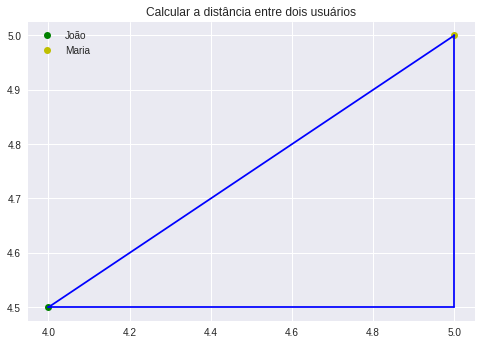

In [15]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [16]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [17]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [18]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5,1,'Calcular a distância entre usuários')

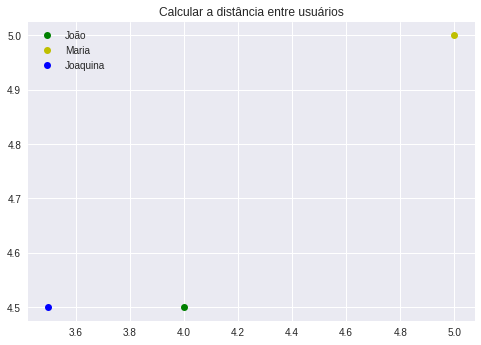

In [19]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")


In [20]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [0]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)


In [0]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

In [0]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [24]:
usuario1.head()

,nota
filmeId,
307,3.5
481,3.5
1091,1.5
1257,4.5
1449,4.5


In [25]:
usuario4.head()

,nota
filmeId,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0


In [26]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

3.0413812651491097

In [0]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [28]:
distancia_de_usuarios(1,4)

[1, 4, 3.0413812651491097]

In [29]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 8620 usuarios


In [30]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 0.0],
 [1, 3, 0.0],
 [1, 4, 3.0413812651491097],
 [1, 5, 0.0]]

In [69]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,100000.000000
3,1,4,3.041381
4,1,5,100000.000000


In [33]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5").dropna()

,nota_1,nota5
filmeId,,


In [34]:
notas_do_usuario(1).join(notas_do_usuario(2), lsuffix="_1", rsuffix="2").dropna()

,nota_1,nota2
filmeId,,


In [35]:
notas_do_usuario(1).join(notas_do_usuario(3), lsuffix="_1", rsuffix="3").dropna()

,nota_1,nota3
filmeId,,


# Usuários sem filmes em comum são colocados bem distante um do outro

In [0]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 100000]
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [37]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,100000.000000
3,1,4,3.041381
4,1,5,100000.000000


In [0]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [39]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
5696,1,1.000000
7713,1,1.000000
593,1,1.118034
214,1,1.118034
8207,1,1.224745


# Parâmetros para teste

In [0]:
def mais_proximos_de(voce_id, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [0]:
def distancia_de_todos(voce_id, n = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [86]:
mais_proximos_de(1, n = 50)

,voce,distancia
outra_pessoa,,
4,1,3.041381
26,1,3.640055
48,1,100000.000000
28,1,100000.000000
29,1,100000.000000
30,1,100000.000000
31,1,100000.000000
32,1,100000.000000
33,1,100000.000000


In [0]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return None
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [0]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [0]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [90]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,voce,distancia
outra_pessoa,,
4,1,3.041381
26,1,3.640055


In [0]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [114]:
sugere_para(1, numero_de_usuarios_a_analisar=50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
2193,5.0,Willow (1988),Action|Adventure|Fantasy,339.0,3.442478
27773,5.0,Old Boy (2003),Mystery|Thriller,348.0,4.081897
349,5.0,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,1069.0,3.653414
8132,5.0,Gladiator (1992),Action|Drama,124.0,3.915323
8360,5.0,Shrek 2 (2004),Adventure|Animation|Children|Comedy|Musical|Ro...,668.0,3.518713


In [115]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
44761,5.0,Brick (2005),Crime|Drama|Film-Noir|Mystery,77.0,3.896104
8955,5.0,Undertow (2004),Crime|Drama|Thriller,10.0,3.750000
2248,5.0,Say Anything... (1989),Comedy|Drama|Romance,305.0,3.770492
3052,5.0,Dogma (1999),Adventure|Comedy|Fantasy,575.0,3.614783
3896,5.0,"Way of the Gun, The (2000)",Crime|Thriller,51.0,3.245098


# Sugerindo baseado em vários usuários

In [0]:
def mais_proximos_de(voce_id, n_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(n_mais_proximos)

In [120]:
mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar=300)

,voce,distancia
outra_pessoa,,
214,1,1.118034
235,1,1.732051


In [0]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [135]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1625,5.0,"Game, The (1997)",Drama|Mystery|Thriller,647.0,3.879444
1748,5.0,Dark City (1998),Adventure|Film-Noir|Sci-Fi|Thriller,436.0,3.751147
4262,5.0,Scarface (1983),Action|Crime|Drama,464.0,3.897629
1242,5.0,Glory (1989),Drama|War,421.0,3.888361
296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2780.0,4.166906


In [136]:
sugere_para(1, numero_de_usuarios_a_analisar = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1939,5.0,"Best Years of Our Lives, The (1946)",Drama|War,74.0,4.027027
1019,5.0,"20,000 Leagues Under the Sea (1954)",Adventure|Drama|Sci-Fi,217.0,3.387097
1272,5.0,Patton (1970),Drama|War,291.0,3.915808
3125,5.0,"End of the Affair, The (1999)",Drama,34.0,3.808824
2660,5.0,"Thing from Another World, The (1951)",Horror|Sci-Fi,43.0,3.825581


In [137]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1449,5.0,Waiting for Guffman (1996),Comedy,214.0,3.922897
2672,5.0,"Thirteenth Floor, The (1999)",Drama|Sci-Fi|Thriller,140.0,3.339286
3365,5.0,"Searchers, The (1956)",Drama|Western,79.0,3.936709
114635,5.0,"Look of Silence, The (2014)",Documentary,7.0,4.500000
1049,5.0,"Ghost and the Darkness, The (1996)",Action|Adventure,168.0,3.532738


In [0]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(k_mais_proximos)

In [0]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)